In [1]:
# LIBRARY
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
def getM(m):
    std = np.sqrt(m)
    M=np.random.normal(0,std,(m,m))
    return(M)

getM(4)

array([[-0.62822521, -3.27084344, -1.26876954,  3.92562021],
       [ 2.77449565,  2.83388108,  0.80152244, -2.25182882],
       [ 4.18615231,  2.16925671, -5.70582942,  1.59632061],
       [ 1.56592784,  0.5748814 ,  2.16124334, -1.4462856 ]])

In [3]:
m=4
M=getM(m)
eVal, eVect = np.linalg.eig(M)
mVect = np.ones(eVal.shape[0])*m
np.column_stack((mVect,eVal))

array([[ 4.        +0.j        ,  1.46165625+2.77018002j],
       [ 4.        +0.j        ,  1.46165625-2.77018002j],
       [ 4.        +0.j        , -2.30002582+0.j        ],
       [ 4.        +0.j        ,  0.42364138+0.j        ]])

In [4]:
n = 100 # number of matrices to generate for each m value
mVals = [8,16,32,64,128,256]
# allEvals = np.array([])
allEvals=np.empty((0,2))
# allEvals = []
for m in mVals:
    print('Calculating results for m='+str(m))
    for i in range(n):
        M=getM(m)
        eVal, eVect = np.linalg.eig(M)
        mVect = np.ones(eVal.shape[0])*m
        e = np.column_stack((mVect,eVal))
        # if allEvals==0
        allEvals = np.append(allEvals,e,axis=0)
        # allEvals.append(e)
    
    h = allEvals[np.where(allEvals[:,0] == m)]
    print(' max: '+str(np.max(h)))
    print(' min: '+str(np.min(h)))
# allEvals

Calculating results for m=8
 max: (11.15101458819534+0j)
 min: (-11.207728301592432+0j)
Calculating results for m=16
 max: (22.014208936335468+0j)
 min: (-23.423128467295882+0j)
Calculating results for m=32
 max: (40.68663094935268+0j)
 min: (-41.0303448355469+0j)
Calculating results for m=64
 max: (75.40797913305101+0j)
 min: (-77.6360795390899+0j)
Calculating results for m=128
 max: (146.79241914290589+0j)
 min: (-148.54915407803432+0j)
Calculating results for m=256
 max: (272.9981228794284+0j)
 min: (-285.5588525164718+0j)


/usr/local/lib/python3.9/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.9/site-packages/matplotlib/transforms.py:788: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


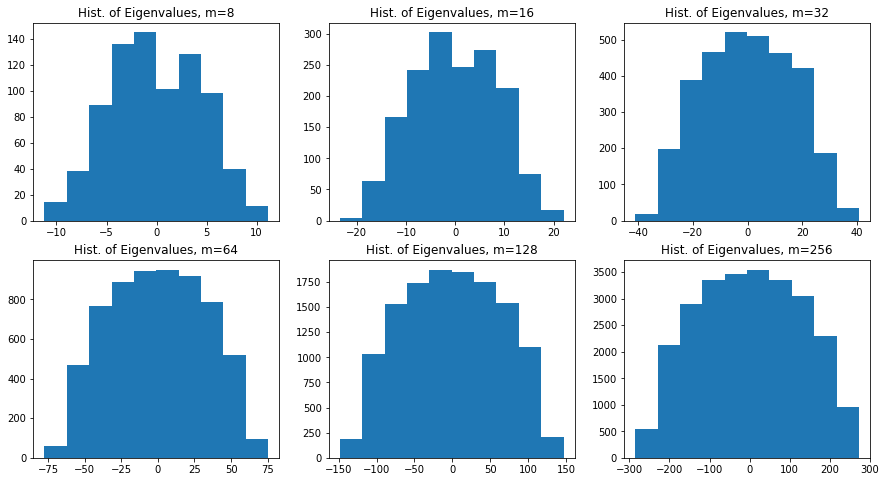

In [5]:
plt.figure(figsize=(15,8))

plt.subplot(2, 3, 1) # row 1, col 2 index 1
m=8
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))

plt.subplot(2, 3, 2) # index 2
m=16
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))


plt.subplot(2, 3, 3) # index 2
m=32
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))



plt.subplot(2, 3, 4) # row 1, col 2 index 1
m=64
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))

plt.subplot(2, 3, 5) # index 2
m=128
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))


plt.subplot(2, 3, 6) # index 2
m=256
h = allEvals[np.where(allEvals[:,0] == m)]
plt.hist(h[:,1])
plt.title("Hist. of Eigenvalues, m="+str(m))


plt.show()

In [6]:
n = 100 # number of matrices to generate for each m value
mVals = [8,16,32,64,128,256,512]
# allEvals = np.array([])
allVals=np.empty((0,4))
# allEvals = []
for m in mVals:
    for i in range(n):
        M=getM(m)
        l2 = np.linalg.norm(M,2)
        eVal, eVect = np.linalg.eig(M)
        sr=np.max(eVal) # rho(M), spectral radius, is it's largest eigenvalue
        
        U,s,V = np.linalg.svd(M)
        svMin = np.min(s) # smallest singular value
        
        # mVect = np.ones(eVal.shape[0])*m
        # e = np.column_stack((mVect,eVal))
        # if allEvals==0
        allVals = np.append(allVals,[[m,l2,sr,svMin]],axis=0)
        # allEvals.append(e)
    
# allNorms

/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


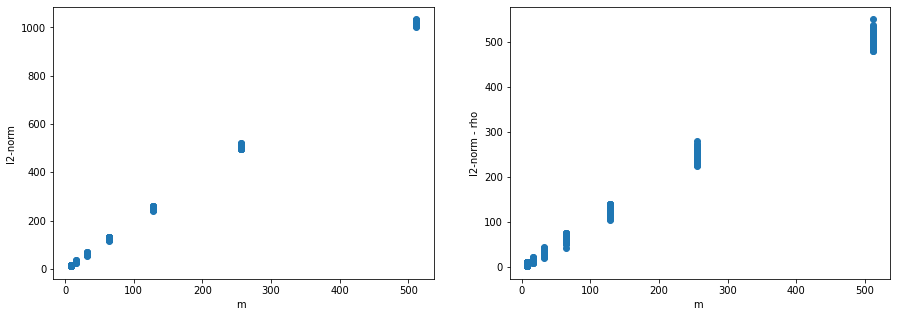

In [9]:
# x = allNorms[:,0] # m
# y = allNorms[:,1] - allNorms[:,2] #l2 - rho(a)
# plt.plot(x, y, 'o');

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(allVals[:,0], allVals[:,1],'o')
# plt.title("Results from (a)")
plt.xlabel('m ')
plt.ylabel('l2-norm ')

plt.subplot(1, 2, 2) # index 2
plt.plot(allVals[:,0], allVals[:,1] - allVals[:,2],'o')
# plt.title("Results from (b)")
plt.xlabel('m ')
plt.ylabel('l2-norm - rho')

plt.show()

/usr/local/lib/python3.9/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.9/site-packages/matplotlib/transforms.py:788: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


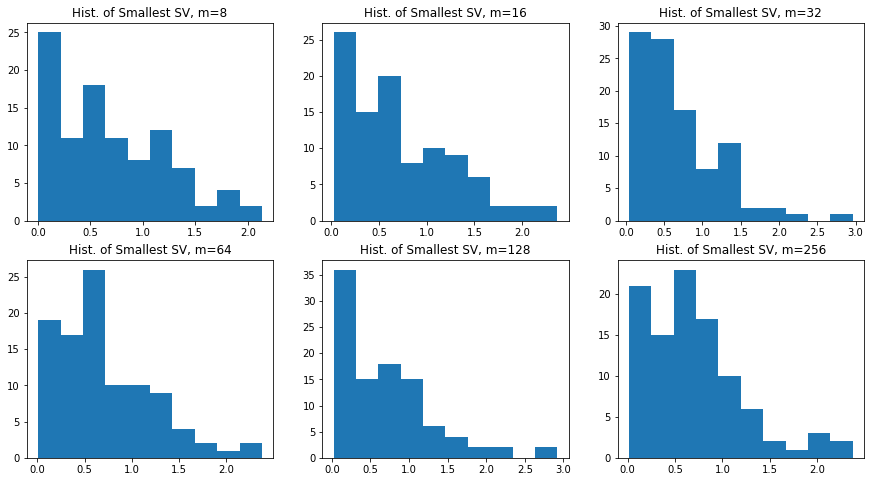

In [8]:
plt.figure(figsize=(15,8))

plt.subplot(2, 3, 1) # row 1, col 2 index 1
m=8
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))

plt.subplot(2, 3, 2) # index 2
m=16
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))


plt.subplot(2, 3, 3) # index 2
m=32
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))



plt.subplot(2, 3, 4) # row 1, col 2 index 1
m=64
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))

plt.subplot(2, 3, 5) # index 2
m=128
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))


plt.subplot(2, 3, 6) # index 2
m=256
h = allVals[np.where(allVals[:,0] == m)][:,3]
plt.hist(h)
plt.title("Hist. of Smallest SV, m="+str(m))


plt.show()